# Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

Had to load it in parts as having it as 1 file was too big for GitHub.

In [5]:
# Did it this way to be able to easily reset the dataframe if needed.
full_df = pd.read_csv('CSV_Datasets/1_Original_Superstore_Dataset/Sample_Superstore_2017.csv')
df = full_df

# Handy Functions

In [6]:
def display_all(df):     # For any Dataframe df
   with pd.option_context('display.max_rows',10000): # Change number of rows accordingly
      with pd.option_context('display.max_columns',100): # Change number of columns accordingly
          display(df)

In [7]:
def Output_full_display(aggregate_data):
    formatted_values = aggregate_data.apply(lambda x: "{:,.2f}".format(x))
    return formatted_values

# Checking the data

In [8]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.shape

(9994, 21)

## Change Data Types [If Any]

In [11]:
df['Postal_Code'] = df['Postal_Code'].astype(str)

In [12]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y")

In [13]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format="%d/%m/%Y")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

## Make Months & Year Columns [If there is a Date]

In [15]:
df['Order_Month_Name'] = df['Order_Date'].dt.strftime('%B')
# df['Order_Month'] = df['ORDERDATE'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

In [16]:
df['Ship_Month_Name'] = df['Ship_Date'].dt.strftime('%B')
# df['Order_Month'] = df['Ship_Date'].dt.month
df['Ship_Year'] = df['Ship_Date'].dt.year

# General Questions

In [17]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Row_ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order_Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship_Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
Order_Year,9994.0,2015.722233,2014.0,2015.0,2016.0,2017.0,2017.0,1.123555
Ship_Year,9994.0,2015.737442,2014.0,2015.0,2016.0,2017.0,2018.0,1.126141


In [18]:
# Calculate the number of unique values in each column
df.nunique()

Row_ID              9994
Order_ID            5009
Order_Date          1237
Ship_Date           1334
Ship_Mode              4
Customer_ID          793
Customer_Name        793
Segment                3
Country                1
City                 531
State                 49
Postal_Code          631
Region                 4
Product_ID          1862
Category               3
Sub_Category          17
Product_Name        1850
Sales               5825
Quantity              14
Discount              12
Profit              7287
Order_Month_Name      12
Order_Year             4
Ship_Month_Name       12
Ship_Year              5
dtype: int64

In [19]:
# Checking for any Nulls in the Dataset.
df.isnull().sum()

Row_ID              0
Order_ID            0
Order_Date          0
Ship_Date           0
Ship_Mode           0
Customer_ID         0
Customer_Name       0
Segment             0
Country             0
City                0
State               0
Postal_Code         0
Region              0
Product_ID          0
Category            0
Sub_Category        0
Product_Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Order_Month_Name    0
Order_Year          0
Ship_Month_Name     0
Ship_Year           0
dtype: int64

## Simple Graphs

In [20]:
df = df.drop(columns=['Row_ID'])

c:\Users\IvanPC\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


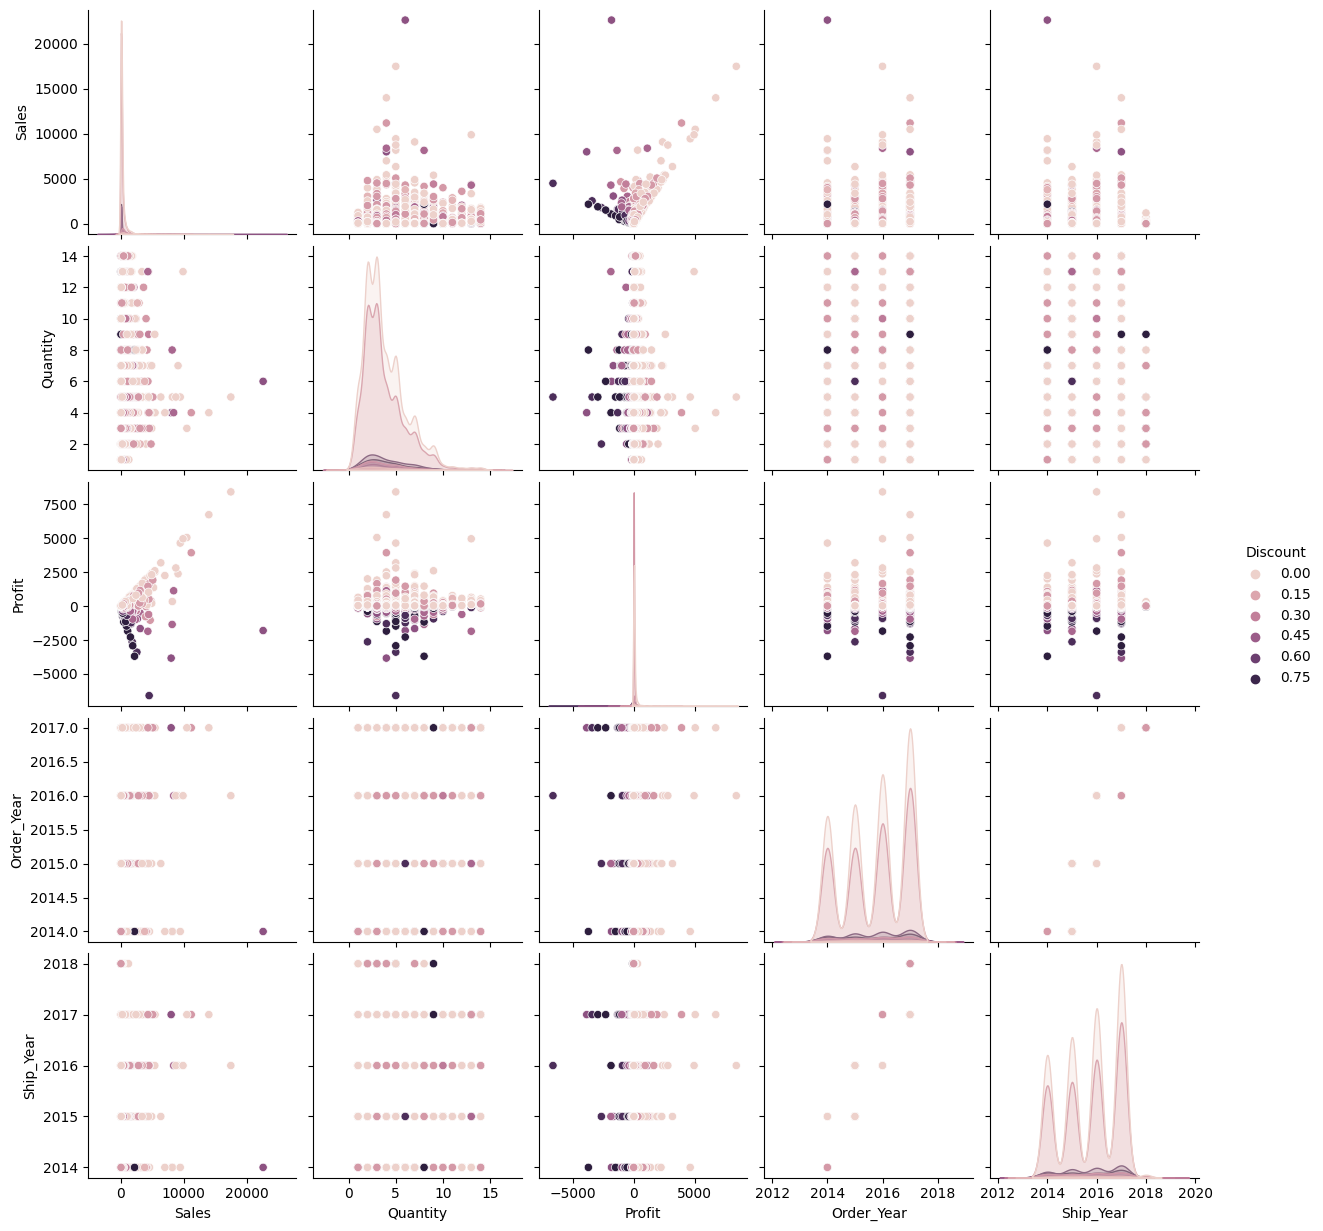

In [21]:
# sns.pairplot(df, hue='Discount')

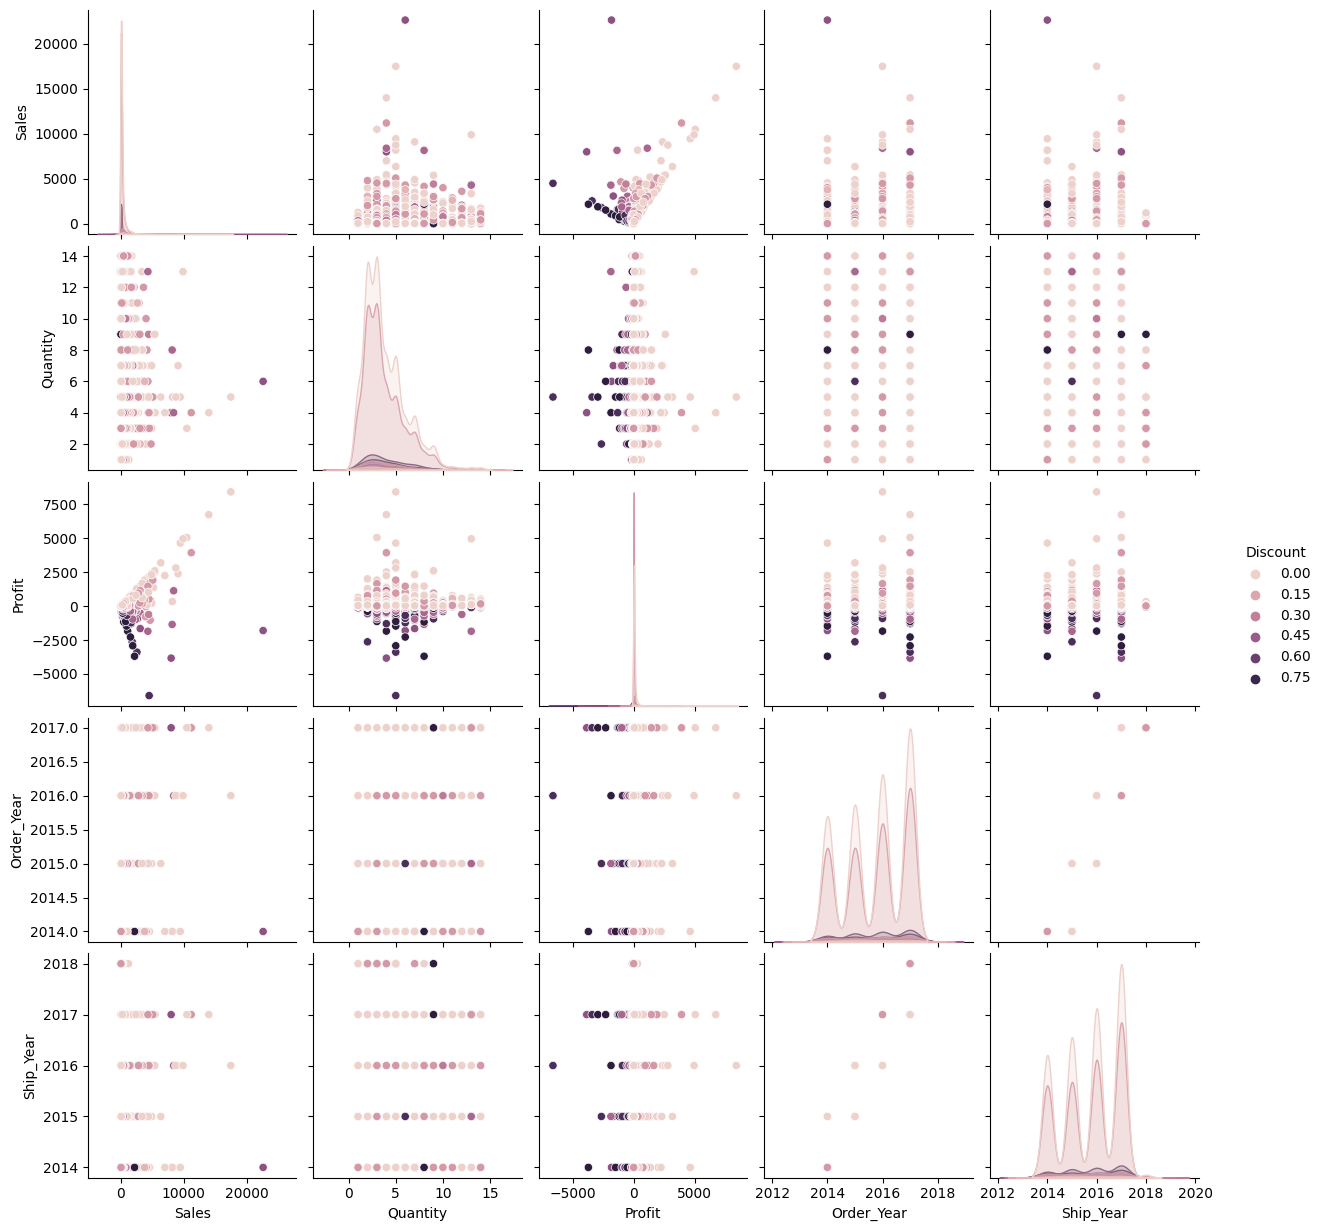

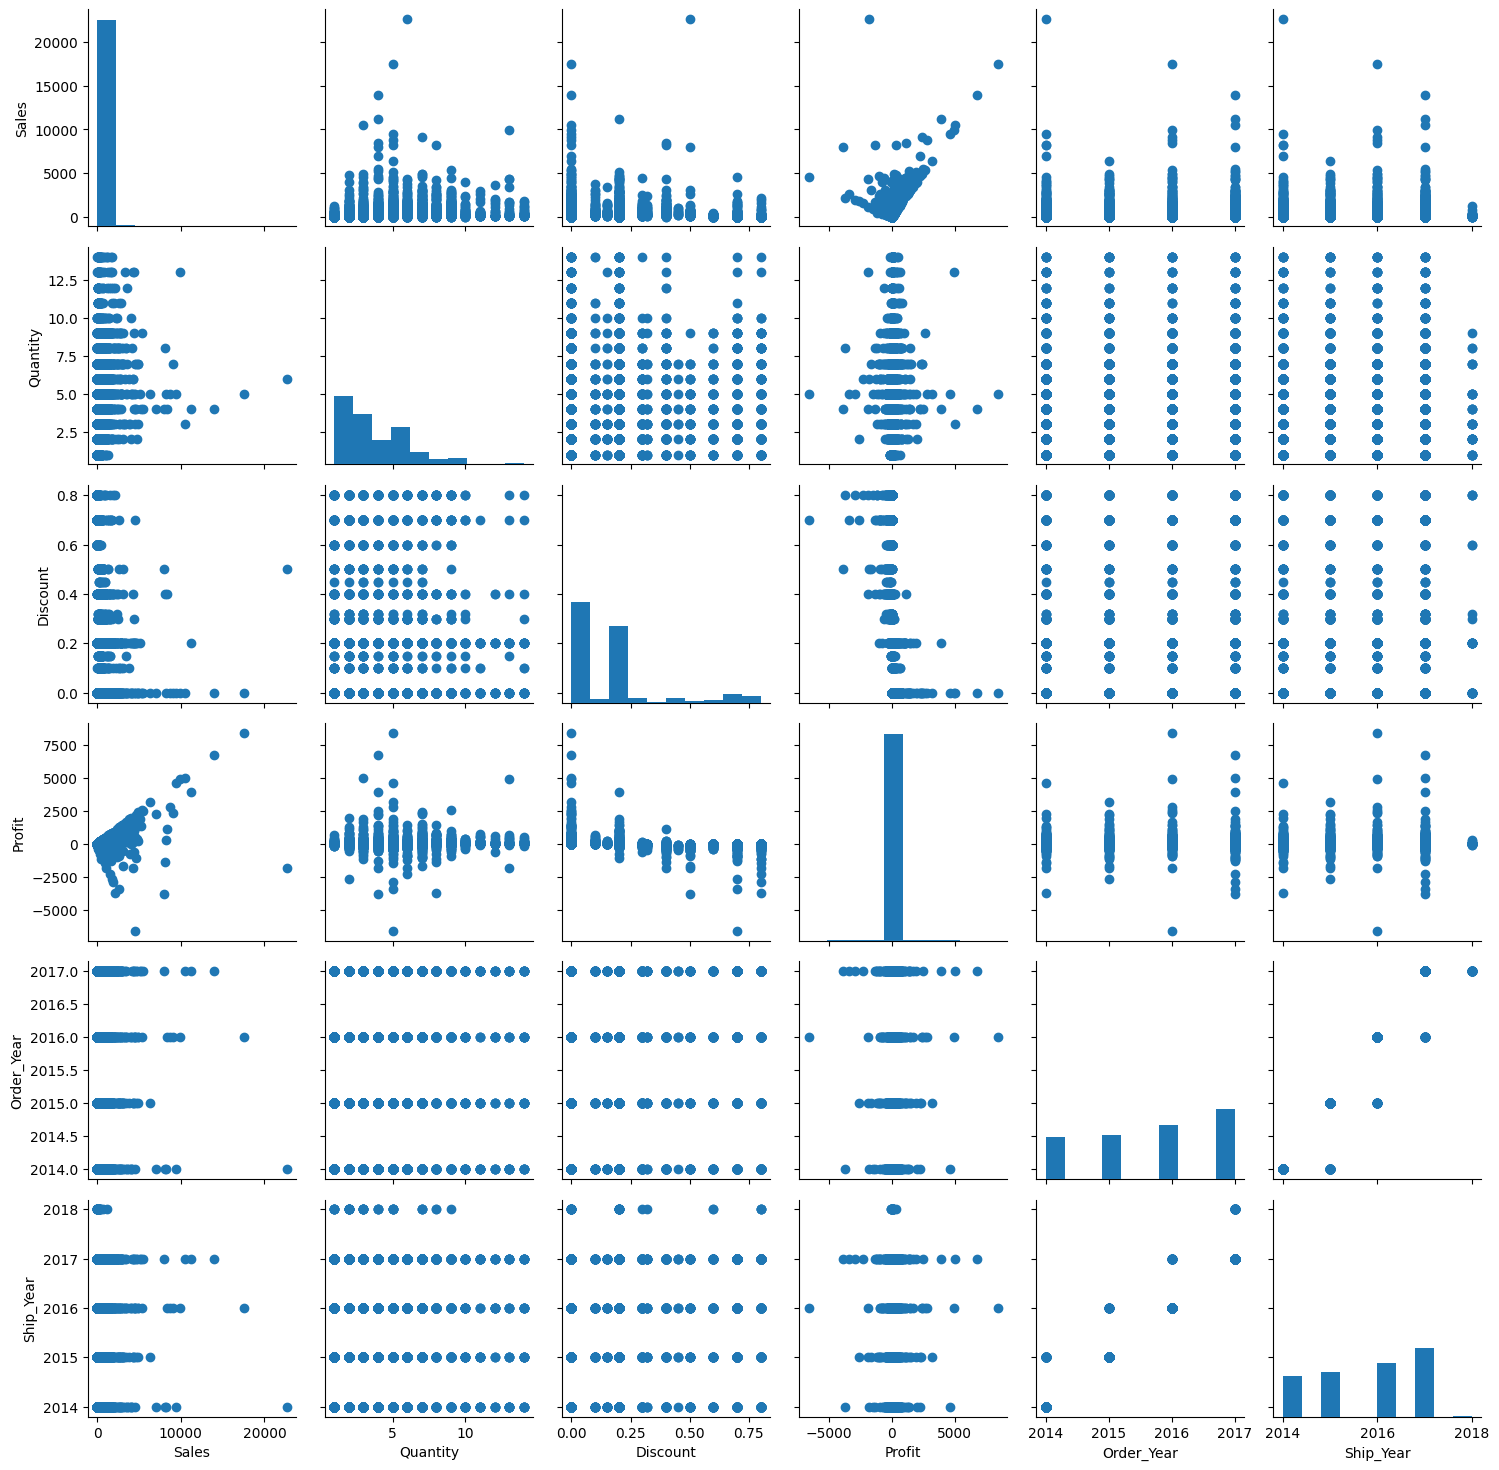

In [22]:
# g = sns.PairGrid(df)
# g.map_diag(plt.hist)
# g.map_upper(plt.scatter)
# g.map_lower(plt.scatter)

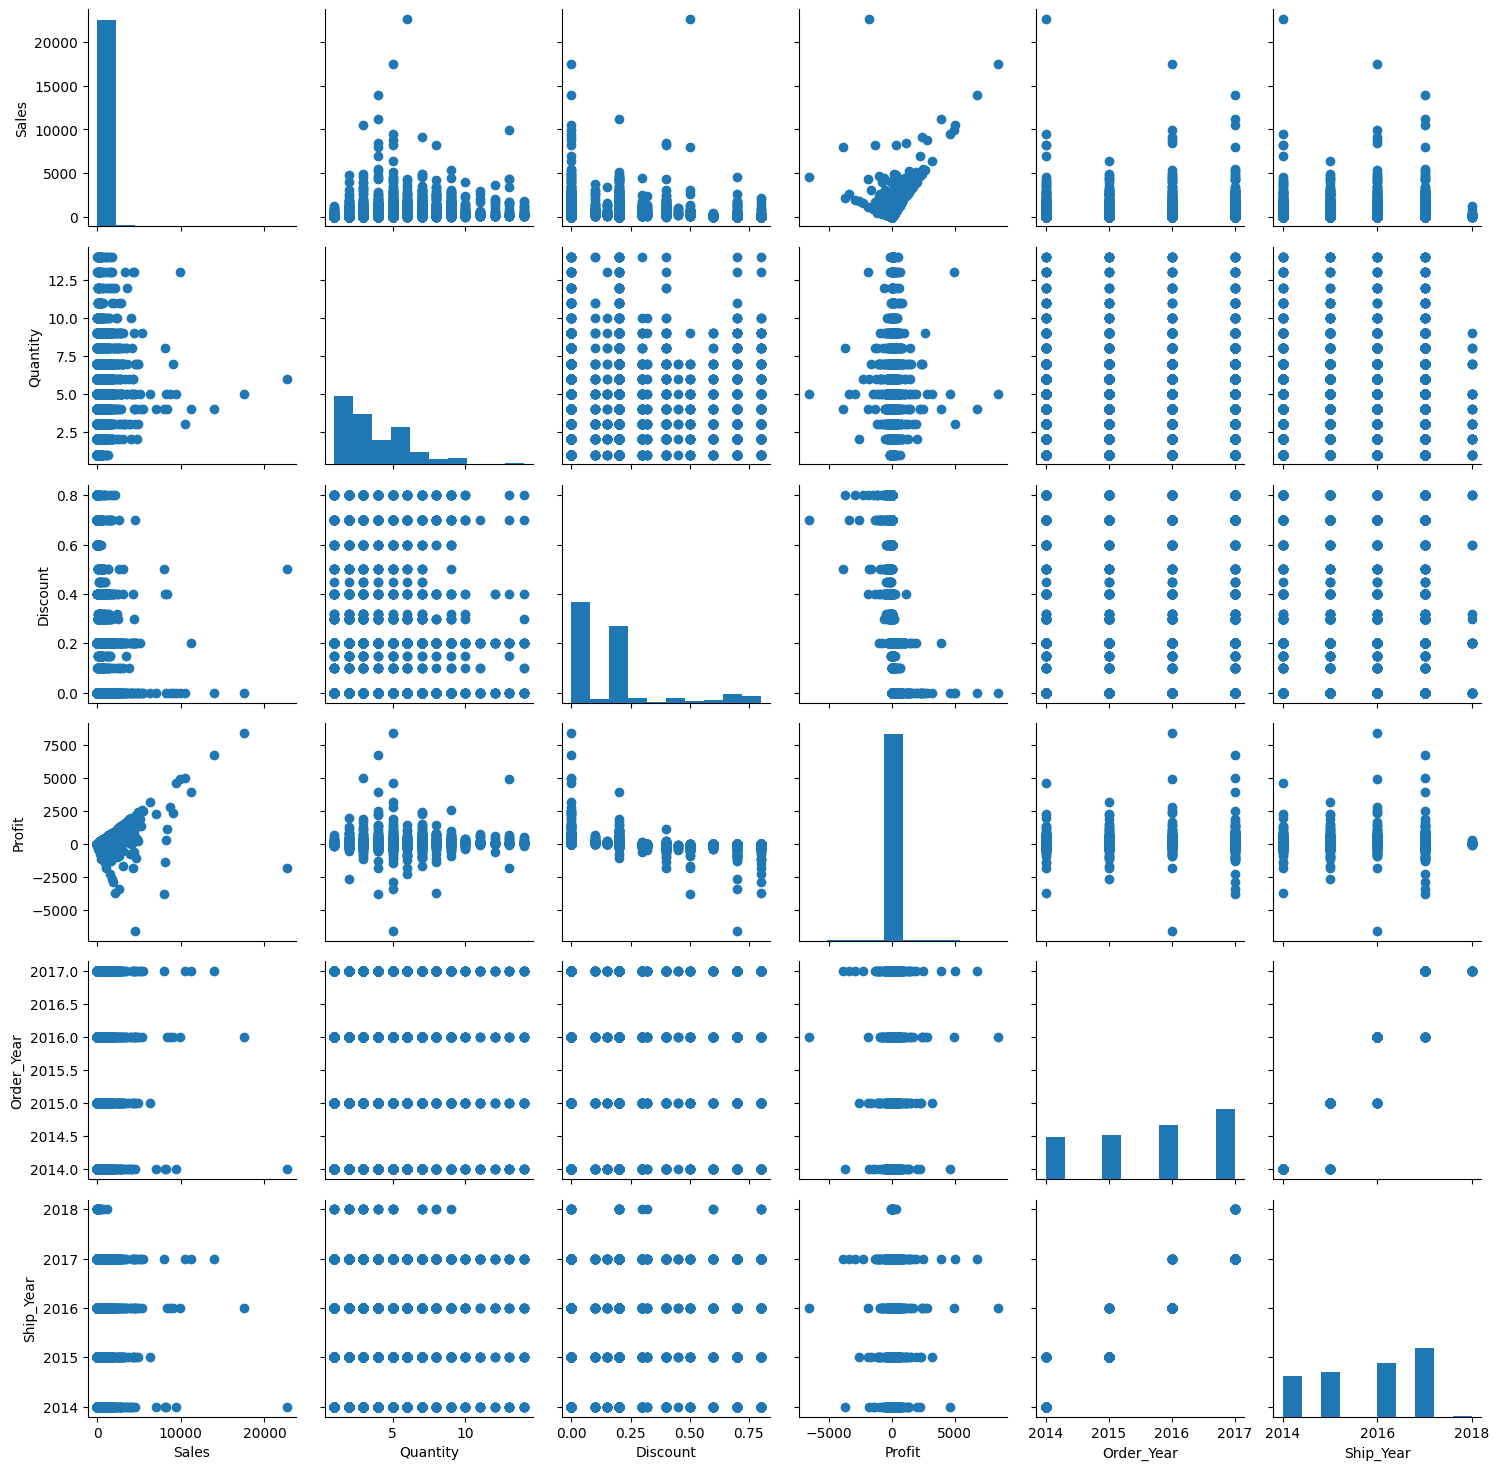

<Axes: >

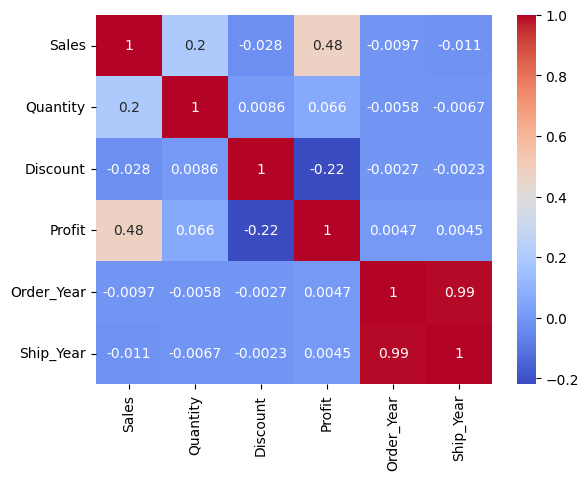

In [23]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

# Specific Questions

## What is the Average Profit for Products?

In [24]:
result = df.groupby('Product_Name')['Profit'].mean().sort_values(ascending=False)

Output_full_display(result.head(10))

Product_Name
Canon imageCLASS 2200 Advanced Copier                                     5,039.99
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     1,995.99
Ativa V4110MDD Micro-Cut Shredder                                         1,886.47
3D Systems Cube Printer, 2nd Generation, Magenta                          1,858.99
Zebra ZM400 Thermal Label Printer                                         1,671.77
                                                                           ...    
Zebra GK420t Direct Thermal/Thermal Transfer Printer                       -938.28
Lexmark MX611dhe Monochrome Laser Printer                                -1,147.49
Cisco TelePresence System EX90 Videoconferencing Unit                    -1,811.08
Cubify CubeX 3D Printer Double Head Print                                -2,959.99
Cubify CubeX 3D Printer Triple Head Print                                -3,839.99
Name: Profit, Length: 1850, dtype: object

## What is the Total Profit for Products?

In [25]:
result = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False)

Output_full_display(result.head(10))

Product_Name
Canon imageCLASS 2200 Advanced Copier                                          25,199.93
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7,753.04
Hewlett Packard LaserJet 3310 Copier                                            6,983.88
Canon PC1060 Personal Laser Copier                                              4,570.93
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4,094.98
                                                                                 ...    
Bush Advantage Collection Racetrack Conference Table                           -1,934.40
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2,876.12
Cubify CubeX 3D Printer Triple Head Print                                      -3,839.99
Lexmark MX611dhe Monochrome Laser Printer                                      -4,589.97
Cubify CubeX 3D Printer Double Head Print                                      -8,879.97
Name: Pr

## How many customers are there per city/state/region

### City

In [26]:
result_df = df.groupby('City')['Customer_ID'].nunique().reset_index()
result_df.columns = ['City', 'Count_of_Customers']

display(result_df.head(10))

,City,Count_of_Customers
0,Aberdeen,1
1,Abilene,1
2,Akron,10
3,Albuquerque,7
4,Alexandria,6
...,...,...
526,Woonsocket,3
527,Yonkers,6
528,York,2
529,Yucaipa,1


In [27]:
total_num_customers = df.groupby('City')['Customer_ID'].nunique().sum()

display(total_num_customers)

4669

### State

In [28]:
result_df = df.groupby('State')['Customer_ID'].nunique().reset_index()
result_df.columns = ['State', 'Count_of_Customers']

display(result_df.head(20))

,State,Count_of_Customers
0,Alabama,34
1,Arizona,100
2,Arkansas,27
3,California,577
4,Colorado,75
5,Connecticut,43
6,Delaware,43
7,District of Columbia,4
8,Florida,181
9,Georgia,83


In [29]:
total_num_customers = df.groupby('State')['Customer_ID'].nunique().sum()

display(total_num_customers)

4063

### Region

In [30]:
result_df = df.groupby('Region')['Customer_ID'].nunique().reset_index()
result_df.columns = ['Region', 'Count_of_Customers']

display(result_df)

,Region,Count_of_Customers
0,Central,629
1,East,674
2,South,512
3,West,686


In [31]:
total_num_customers = df.groupby('Region')['Customer_ID'].nunique().sum()

display(total_num_customers)

2501

## Which Customers are from more than 1 city

In [32]:
# Group by 'Customer_ID' and count the number of unique cities
customer_city_counts = df.groupby('Customer_ID')['City'].nunique()

# Filter for customers associated with more than one city
customers_in_multiple_cities = customer_city_counts[customer_city_counts > 1]

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Customer_ID': customers_in_multiple_cities.index,
    'Num_of_Cities': customers_in_multiple_cities.values
})

display_all(result_df.head(10)) # Remove .head() if you want to see all the records or change the head value.

,Customer_ID,Num_of_Cities
0,AA-10315,4
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
5,AB-10060,8
6,AB-10105,9
7,AB-10150,5
8,AB-10165,7
9,AB-10255,8


In [33]:
# Check to see if the above code is True
random_customer = df[df['Customer_ID'] == 'AB-10015'].sort_values(by='Order_Date')
display_all(random_customer.reset_index(drop=True).head(20))

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Month_Name,Order_Year,Ship_Month_Name,Ship_Year
0,CA-2014-152905,2014-02-18,2014-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,Texas,76017,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,February,2014,February,2014
1,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,March,2014,March,2014
2,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,March,2014,March,2014
3,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,March,2014,March,2014
4,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,November,2016,November,2016
5,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120,Central,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,November,2016,November,2016


## Which Customers are from more than 1 state

In [34]:
# Group by 'Customer_ID' and count the number of unique cities
customer_state_counts = df.groupby('Customer_ID')['State'].nunique()

# Filter for customers associated with more than one city
customers_in_multiple_states = customer_state_counts[customer_state_counts > 1]

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Customer_ID': customers_in_multiple_states.index,
    'Num_of_Cities': customers_in_multiple_states.values
})

display_all(result_df.head(10)) # Remove .head() if you want to see all the records or change the head value.

,Customer_ID,Num_of_Cities
0,AA-10315,4
1,AA-10375,8
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3
5,AB-10060,7
6,AB-10105,8
7,AB-10150,3
8,AB-10165,6
9,AB-10255,8


## Ranking of ship modes by volume/Profit

In [35]:
ship_mode_counts = df['Ship_Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship_Mode', 'Ship_Volume']

ship_profit = df.groupby('Ship_Mode')['Profit'].sum().reset_index()

# Merging the count and profit DataFrames
df_ship_ranking = pd.merge(ship_mode_counts, ship_profit, on='Ship_Mode', how='inner')

# Adding rankings
df_ship_ranking['Ship_Volume_Ranking'] = df_ship_ranking['Ship_Volume'].rank(ascending=False).apply(lambda x: '{:.0f}'.format(x))
df_ship_ranking['Ship_Profit_Ranking'] = df_ship_ranking['Profit'].rank(ascending=False).apply(lambda x: '{:.0f}'.format(x))

# Formatting profit to two decimal places
df_ship_ranking['Profit'] = df_ship_ranking['Profit'].apply(lambda x: '{:.2f}'.format(x))

display_all(df_ship_ranking.head())

,Ship_Mode,Ship_Volume,Profit,Ship_Volume_Ranking,Ship_Profit_Ranking
0,Standard Class,5968,164088.79,1,1
1,Second Class,1945,57446.64,2,2
2,First Class,1538,48969.84,3,3
3,Same Day,543,15891.76,4,4


## How many are discounted compared to non-discounted

- 0 means the order is not discounted
- 1 means the order is discounted

In [36]:
# Create 'is_discounted' column based on conditions
df['is_discounted'] = df['Discount'].apply(lambda x: 0 if x == 0.00 else 1)

display_all(df.head(10)) # Remove .head() if you want to see all the records or change the head value.

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Month_Name,Order_Year,Ship_Month_Name,Ship_Year,is_discounted
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,November,2016,0
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,November,2016,0
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,June,2016,0
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,October,2015,1
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,October,2015,1
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,June,2014,June,2014,0
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,June,2014,June,2014,0
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,June,2014,June,2014,1
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,June,2014,June,2014,1
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,June,2014,June,2014,0


In [37]:
# Answer to the question
counts = df['is_discounted'].value_counts()

display(counts)

is_discounted
1    5196
0    4798
Name: count, dtype: int64

In [38]:
# The Profit comparison of Discount vs Non-Discounted
result = df.groupby('is_discounted')['Profit'].sum()

Output_full_display(result)

is_discounted
0    320,987.60
1    -34,590.58
Name: Profit, dtype: object

In [39]:
# Custom labels for the pie chart
labels = ['1: Discounted', '0: Non-discounted']

Text(0.5, 1.0, 'Discounted vs. Non-discounted Products')

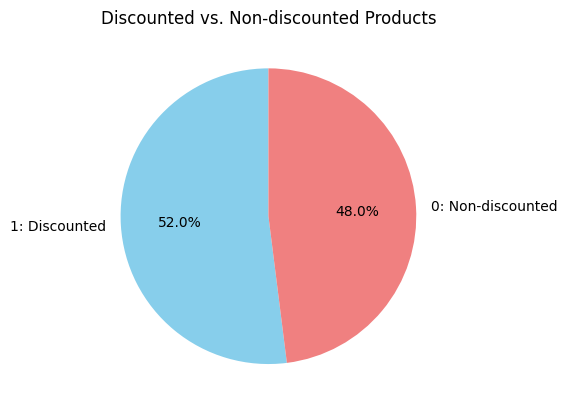

In [40]:
# Create a pie chart using Matplotlib
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Discounted vs. Non-discounted Products')


Text(0.5, 1.0, 'Discounted vs. Non-discounted Products')

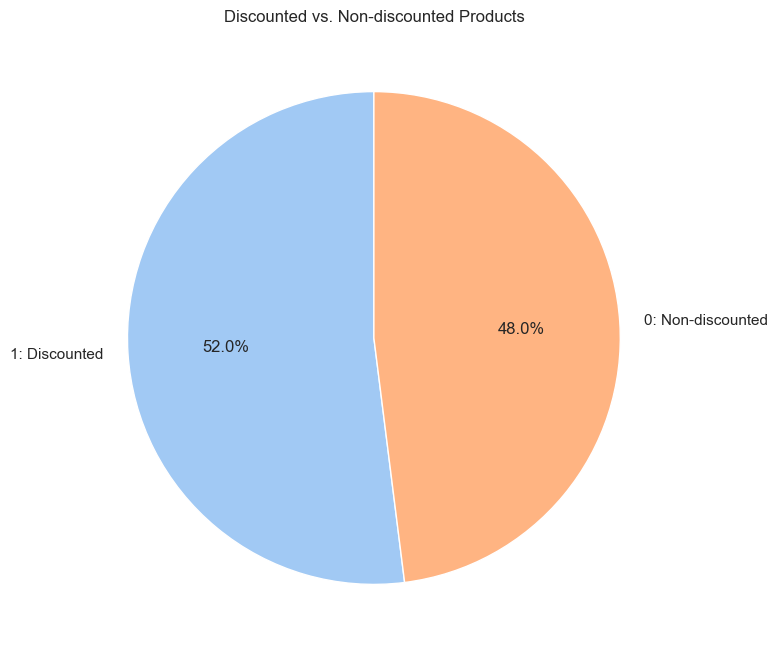

In [41]:
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Title for the pie chart
plt.title('Discounted vs. Non-discounted Products')

## Ranking for products in Volume/Profit

In [42]:
product_count = df['Product_Name'].value_counts().reset_index()
product_count.columns = ['Product_Name', 'Product_Volume']

product_profit = df.groupby('Product_Name')['Profit'].sum().reset_index()

# Merging the count and profit DataFrames
df_product_ranking = pd.merge(product_count, product_profit, on='Product_Name', how='inner')

# Sorting by volume and profit in descending order
df_product_ranking = df_product_ranking.sort_values(by=['Product_Volume', 'Profit'], ascending=[False, False])

# Adding rankings
df_product_ranking['Volume_Ranking'] = df_product_ranking['Product_Volume'].rank(ascending=False, method='dense').apply(lambda x: '{:.0f}'.format(x))
df_product_ranking['Profit_Ranking'] = df_product_ranking['Profit'].rank(ascending=False, method='dense').apply(lambda x: '{:.0f}'.format(x))

# Formatting profit to two decimal places
df_product_ranking['Profit'] = df_product_ranking['Profit'].apply(lambda x: '{:.2f}'.format(x))

display_all(df_product_ranking.head(10)) # Remove .head() if you want to see all the records or change the head value.

,Product_Name,Product_Volume,Profit,Volume_Ranking,Profit_Ranking
0,Staple envelope,48,751.63,1,102
2,Easy-staple paper,46,1096.03,2,63
1,Staples,46,292.20,2,281
3,Avery Non-Stick Binders,20,43.55,3,937
4,Staples in misc. colors,19,124.05,4,507
5,Staple remover,18,24.07,5,1162
6,KI Adjustable-Height Table,18,-248.48,5,1766
7,Storex Dura Pro Binders,17,50.55,6,867
8,Staple-based wall hangings,16,121.99,7,518
9,Logitech 910-002974 M325 Wireless Mouse for We...,15,536.22,8,156


In [43]:
# Check to see if the above code is True
random_product = df[df['Product_Name'] == 'Staple-based wall hangings'].sort_values(by='Order_Date')

display_all(random_product.reset_index(drop=True).head(20))

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Month_Name,Order_Year,Ship_Month_Name,Ship_Year,is_discounted
0,CA-2014-143917,2014-07-25,2014-07-27,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,California,94122,West,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,77.920,8,0.0,34.2848,July,2014,July,2014,0
1,CA-2014-120544,2014-11-23,2014-11-27,Standard Class,SS-20140,Saphhira Shifley,Corporate,United States,Mesquite,Texas,75150,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,6.368,2,0.6,-2.5472,November,2014,November,2014,1
2,CA-2014-164721,2014-11-25,2014-11-27,Second Class,LW-16825,Laurel Workman,Corporate,United States,Brentwood,California,94513,West,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,23.880,3,0.0,10.5072,November,2014,November,2014,0
3,CA-2015-129700,2015-05-04,2015-05-05,First Class,LA-16780,Laura Armstrong,Corporate,United States,Tinley Park,Illinois,60477,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,22.288,7,0.6,-8.9152,May,2015,May,2015,1
4,CA-2015-121783,2015-11-10,2015-11-14,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Roseville,Minnesota,55113,Central,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,29.220,3,0.0,12.8568,November,2015,November,2015,0
5,CA-2015-114048,2015-12-14,2015-12-18,Standard Class,EH-13945,Eric Hoffmann,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,29.220,3,0.0,12.8568,December,2015,December,2015,0
6,CA-2016-128818,2016-05-07,2016-05-11,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,New York City,New York,10009,East,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,63.680,8,0.0,28.0192,May,2016,May,2016,0
7,CA-2016-157749,2016-06-04,2016-06-09,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,Chicago,Illinois,60610,Central,FUR-FU-10004351,Furniture,Furnishings,Staple-based wall hangings,11.688,3,0.6,-4.6752,June,2016,June,2016,1
8,CA-2016-130050,2016-07-16,2016-07-18,Second Class,MC-17425,Mark Cousins,Corporate,United States,Houston,Texas,77036,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,9.552,3,0.6,-3.8208,July,2016,July,2016,1
9,CA-2016-128916,2016-08-18,2016-08-20,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77070,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,9.552,3,0.6,-3.8208,August,2016,August,2016,1


## Which months/years has the most sales in volume/profit

In [44]:
# Which Month are the customers most active
df['Order_Month_Name'].value_counts()

Order_Month_Name
November     1471
December     1408
September    1383
October       819
May           735
June          717
July          710
August        706
March         696
April         668
January       381
February      300
Name: count, dtype: int64

In [45]:
# Which months made the most profit
Output_full_display(df.groupby('Order_Month_Name')['Profit'].sum())

Order_Month_Name
April        11,587.44
August       21,776.94
December     43,369.19
February     10,294.61
January       9,134.45
July         13,832.66
June         21,285.80
March        28,594.69
May          22,411.31
November     35,468.43
October      31,784.04
September    36,857.48
Name: Profit, dtype: object

In [46]:
# How many orders were made each year
df['Order_Year'].value_counts().sort_values(ascending=True)

Order_Year
2014    1993
2015    2102
2016    2587
2017    3312
Name: count, dtype: int64

In [47]:
# Which years made the most profit
Output_full_display(df.groupby('Order_Year')['Profit'].sum())

Order_Year
2014    49,543.97
2015    61,618.60
2016    81,795.17
2017    93,439.27
Name: Profit, dtype: object

In [48]:
df[['Order_Year', 'Order_Month_Name']].value_counts().sort_values(ascending=True)

Order_Year  Order_Month_Name
2014        February             46
2015        January              58
            February             64
2014        January              79
2016        February             83
            January              89
2017        February            107
2014        May                 122
            April               135
            June                135
2015        March               138
            June                138
            July                140
2014        July                143
2015        May                 146
2014        August              153
2017        January             155
2014        March               157
            October             159
2015        August              159
            April               160
2016        March               163
2015        October             166
2016        April               170
            August              176
            October             196
            June                199

In [49]:
df[['Order_Year', 'Order_Month_Name']].value_counts().sort_index(ascending=True)

Order_Year  Order_Month_Name
2014        April               135
            August              153
            December            278
            February             46
            January              79
            July                143
            June                135
            March               157
            May                 122
            November            318
            October             159
            September           268
2015        April               160
            August              159
            December            316
            February             64
            January              58
            July                140
            June                138
            March               138
            May                 146
            November            324
            October             166
            September           293
2016        April               170
            August              176
            December            352

## Products sold per Month for each Year

In [50]:
# Products sold per Month for each Year
result = df[['Order_Year', 'Order_Month_Name', 'Product_Name']].value_counts().sort_index(ascending=True)

display_all(result.head(20))

Order_Year  Order_Month_Name  Product_Name                                                                                                                   
2014        April             12 Colored Short Pencils                                                                                                           1
                              2300 Heavy-Duty Transfer File Systems by Perma                                                                                     1
                              ACCOHIDE 3-Ring Binder, Blue, 1"                                                                                                   1
                              ACCOHIDE Binder by Acco                                                                                                            1
                              AT&T 1080 Corded phone                                                                                                             1
                           

In [51]:
# How many of those are unique
result = df.groupby(['Order_Year', 'Order_Month_Name'])['Product_Name'].nunique().sort_index(ascending=True)

display_all(result.head(20))

Order_Year  Order_Month_Name
2014        April               130
            August              146
            December            256
            February             45
            January              77
            July                138
            June                130
            March               151
            May                 115
            November            290
            October             152
            September           245
2015        April               151
            August              151
            December            290
            February             63
            January              58
            July                128
            June                133
            March               134
            May                 139
            November            296
            October             154
            September           271
2016        April               165
            August              166
            December            314

In [52]:
# Shows how many of the unique products was sold each year
result = df.groupby(['Order_Year'])['Product_Name'].nunique().sort_index(ascending=True)

display_all(result.head(20))

Order_Year
2014    1212
2015    1242
2016    1362
2017    1511
Name: Product_Name, dtype: int64

In [53]:
# Grouping by 'Order_Year' and 'Product_Name', counting unique months
product_month_counts = df.groupby(['Order_Year', 'Product_Name', 'Order_Month_Name']).size().reset_index(name='Count')

# Filtering products that appear in multiple months within the same year
multiple_months = product_month_counts.groupby(['Order_Year', 'Product_Name'])['Count'].count().reset_index(name='MonthsCount')

# Filtering products that show up in more than one month within the same year
Frequent_Products_sold = multiple_months[multiple_months['MonthsCount'] > 1]

# Displaying the products that show up in multiple months within the same year
display_all(Frequent_Products_sold.head())

,Order_Year,Product_Name,MonthsCount
0,2014,"#10 White Business Envelopes,4 1/8 x 9 1/2",2
1,2014,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
3,2014,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2
16,2014,4009 Highlighters by Sanford,2
18,2014,9-3/4 Diameter Round Wall Clock,2


In [54]:
# How many products are sold in more than 1 month
Frequent_Products_sold['Order_Year'].value_counts().sort_values(ascending=True)

Order_Year
2014    494
2015    514
2016    696
2017    917
Name: count, dtype: int64

In [55]:
# To check the above code is correct by looking at the Order_Year at the end
# You can skip to the end of the list 
display_all(Frequent_Products_sold.head(495))

,Order_Year,Product_Name,MonthsCount
0,2014,"#10 White Business Envelopes,4 1/8 x 9 1/2",2
1,2014,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
3,2014,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",2
16,2014,4009 Highlighters by Sanford,2
18,2014,9-3/4 Diameter Round Wall Clock,2
19,2014,"ACCOHIDE 3-Ring Binder, Blue, 1""",3
24,2014,AT&T 1080 Corded phone,2
27,2014,AT&T CL2909,2
28,2014,AT&T CL82213,3
31,2014,AT&T TR1909W,3


# Conclusion

Exploring through the Superstore 2017 dataset:
- I discovered that it is made up of 9994 total records and 21 columns.
- Though I don't show it I did use Tableau Public to have a quick scan through the dataset to help me write some specific questions.
- No Nulls were found.
- I did find that most customers seem to travel alot across states and that 52% of all the orders made were on discount, yet those made no profit, but atleast minimised the losses.
- Also, It seems only 1212 out of 1850 (65.51%) unique products were sold in 2014 and for the rest you can find those yourself.
- Of those 1212 out of 1850 (65.51%) unique products were sold in 2014, only 494 of 1212 (40.76%) were sold in multiple months. 
    - So, only 26.70% unique products were sold in multiple months in the whole dataset for 2014.

From this I could have asked myself another question, "Which products were not sold for multiple Months/Years (done separately)"

I found that Python helped alot with data manipulation and general investigations, however, probably due to lack of knowledge, I couldn't get some of the outputs displayed the way I wanted them to be, whereas, if I did it in SQL it would have been alot easier.

# Next Steps

- I have decided to use this dataset as a seed to create a further enriched superstore dataset by using SQL in Oracle.
- Where I will do the same as I have done here as well as the question I didn't answer previously.
- I will most likely clean the superstore 2017 data in Excel before importing it into Oracle. The reason I chose Excel is that I find it easy and straight forward.

# Advice to avoid the same mistakes I did

When cleaning the data, I would particularly focus on the Product_Name and add another column called "Brand_Name".

Where the Brand_Name you choose for each product is what ever you desire.

Some Product_Name will give you some ideas like Acco, Acme, Xerox and so on.